In [1]:
import numpy as np
import os

import glob
import cv2
import imageio

import tqdm

import matplotlib.pyplot as plt

# Test :

In [2]:
os.chdir("C:/Users/gcorda/Desktop/Perso/4. Python/5. Challenges/1. Plant Seedlings Class/Data/Train/")

In [3]:
im = imageio.imread('Black-grass/0ace21089.png')
print(im.shape)

(1899, 1900, 3)


# Load Data :

## 1st Method :

### Building Datasets :

In [4]:
data_folder = "C:/Users/gcorda/Desktop/Perso/4. Python/5. Challenges/1. Plant Seedlings Class/Data/"
train_data_folder = os.path.join(data_folder, "train")

In [5]:
images_per_class = {}
for class_folder_name in os.listdir(train_data_folder):
    class_folder_path = os.path.join(train_data_folder, class_folder_name)
    class_label = class_folder_name
    images_per_class[class_label] = []
    
    for image_path in glob.glob(os.path.join(class_folder_path, "*.png")):
        image_rgb = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)
        images_per_class[class_label].append(image_bgr)

In [6]:
for key,value in images_per_class.items():
    print("{0} -> {1}".format(key, len(value)))

Black-grass -> 263
Charlock -> 390
Cleavers -> 287
Common Chickweed -> 611
Common wheat -> 221
Fat Hen -> 475
Loose Silky-bent -> 654
Maize -> 221
Scentless Mayweed -> 516
Shepherds Purse -> 231
Small-flowered Cranesbill -> 496
Sugar beet -> 385


In [7]:
def plot_for_class(label):
    nb_rows = 3
    nb_cols = 3
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(3, 3))

    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].xaxis.set_ticklabels([])
            axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].imshow(images_per_class[label][n])
            n += 1    
    plt.show()

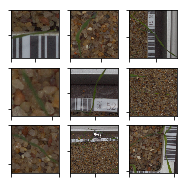

In [8]:
plot_for_class('Black-grass')

### Images preprocessing :

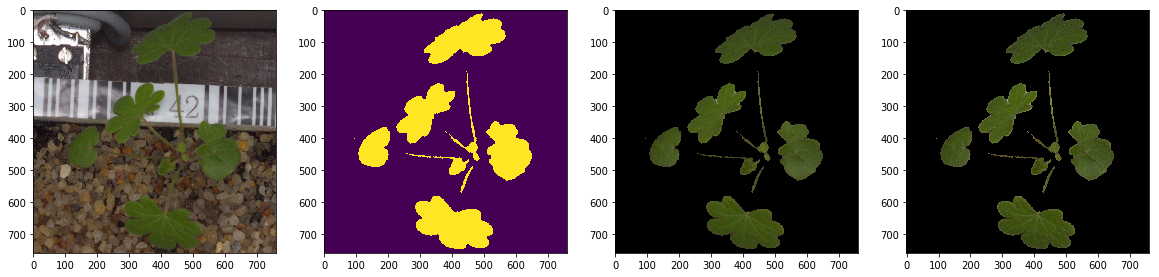

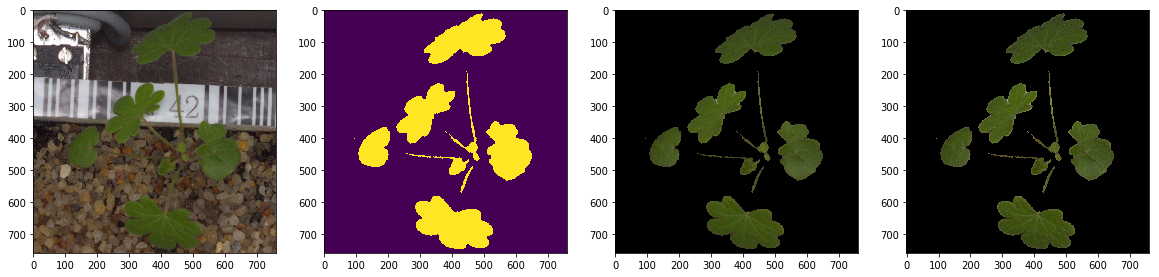

In [10]:
# Test image to see the changes
image = images_per_class["Small-flowered Cranesbill"][97]
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

sensitivity = 35
lower_hsv = np.array([60 - sensitivity, 100, 50])
upper_hsv = np.array([60 + sensitivity, 255, 255])

mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

output = cv2.bitwise_and(image, image, mask = mask)

output_blurred = cv2.GaussianBlur(output, (0, 0), 3)
output_sharp = cv2.addWeighted(output, 1.5, output_blurred, -0.5, 0)

fig, axs = plt.subplots(1, 4, figsize=(20, 20))
axs[0].imshow(image)
axs[1].imshow(mask)
axs[2].imshow(output)
axs[3].imshow(output_sharp)
plt.show()